In [5]:
import jax
import matplotlib.pyplot as plt
import os

from doobs_score_matching.src.sdes import sde_kunita, sde_utils, time
from experiments.plotting import load_checkpoint_w_batch_stats, load_checkpoint_wo_batch_stats, checkpoint_unet
from src import data_boundary_pts


In [6]:
num_landmarks = 10
checkpoint_path = os.path.abspath(f"../../checkpoints/kunita/fw/circ_r1_lms_{num_landmarks}")
# checkpoint_path = os.path.abspath(f"../../checkpoints/kunita/fw/fixed_x0_lms_{num_landmarks}")
trained_score, restored = checkpoint_unet(checkpoint_path)
# trained_score, restored = load_checkpoint_w_batch_stats(checkpoint_path)
print(restored['training'])

{'batch_size': 100, 'epochs_per_load': 1, 'load_size': 5000, 'lr': 0.005, 'num_reloads': 100}


In [7]:
key = jax.random.PRNGKey(0)
ts = time.grid(0, 1.0, 100)

y = data_boundary_pts.sample_circle(num_landmarks, radius=2.)

target = restored['sde']['x0']
target = target.reshape(-1, 2)

drift, diffusion = sde_kunita.vector_fields()
bm_shape = (sde_kunita.GRID_SIZE**2 * 2,)

backward_trajs = sde_utils.backward(key, ts, y, trained_score, drift, diffusion, bm_shape)
forward_traj = sde_utils.solution(key, ts, y, drift, diffusion, bm_shape)

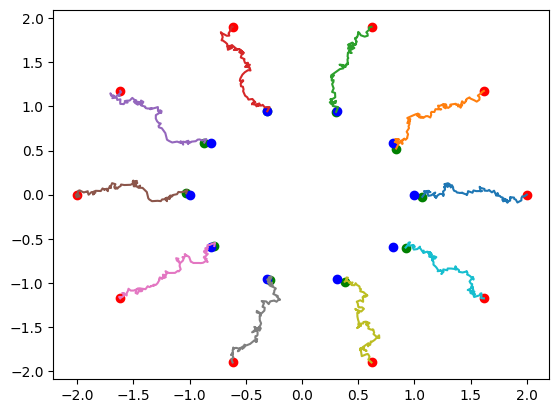

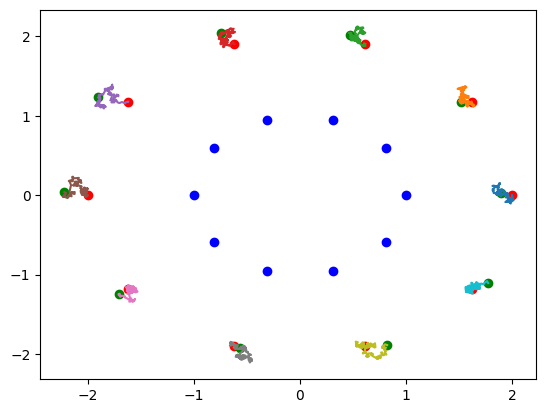

In [8]:
backward_traj = backward_trajs.reshape(-1, num_landmarks, 2)

for landmark in range(backward_traj.shape[1]):
    plt.plot(backward_traj[:, landmark, 0], backward_traj[:, landmark, 1])
    plt.scatter(backward_traj[0, landmark, 0], backward_traj[0, landmark, 1], c='red')
    plt.scatter(backward_traj[-1, landmark, 0], backward_traj[-1, landmark, 1], c='green')
    plt.scatter(target[landmark, 0], target[landmark, 1], c='blue')
plt.show()

forward_traj = forward_traj.reshape(-1, num_landmarks, 2)

for landmark in range(forward_traj.shape[1]):
    plt.plot(forward_traj[:, landmark, 0], forward_traj[:, landmark, 1])
    plt.scatter(forward_traj[0, landmark, 0], forward_traj[0, landmark, 1], c='red')
    plt.scatter(forward_traj[-1, landmark, 0], forward_traj[-1, landmark, 1], c='green')
    plt.scatter(target[landmark, 0], target[landmark, 1], c='blue')

plt.show()